# Plot DES-Y3 data vector

I'm only doing this to learn how the data vector and mask files are organized. My goal is to reproduce something like Figures 2, 3, and 5 from [DES-Y3 results paper](https://arxiv.org/pdf/2105.13549.pdf).

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os

In [56]:
# Adjusting plot settings in rcParams
rcParams['savefig.bbox'] = 'tight'
rcParams['figure.titlesize'] = 'large'
rcParams['figure.figsize'] = (10,10)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.size'] = 15


In [18]:
data_vector_file_full = np.loadtxt('Y3_unblinded_final.txt')
indices = data_vector_file_full[:,0]
values = data_vector_file_full[:,1]
thetas = np.logspace(np.log10(2.5), np.log10(250), 20)
num_source_bins = 4
num_lens_bins = 5

In [32]:
num_xi_plus_spectra = num_source_bins * (num_source_bins + 1) / 2
num_xi_minus_spectra = num_xi_plus_spectra
num_gamma_t_spectra = num_source_bins * num_lens_bins
num_w_spectra = num_lens_bins
print('Number of spectra:')
print(fr'        \xi^+: {num_xi_plus_spectra:.0f}')
print(fr'        \xi^-: {num_xi_minus_spectra:.0f}')
print(fr'        \gamma_t: {num_gamma_t_spectra}')
print(fr'        w: {num_w_spectra}')
print(fr'        Total: {num_xi_plus_spectra + num_xi_minus_spectra + num_gamma_t_spectra + num_w_spectra}')
print(fr'with {len(thetas)} angular bins')
print(fr'totalizes {(num_xi_plus_spectra + num_xi_minus_spectra + num_gamma_t_spectra + num_w_spectra) * len(thetas):.0f} data points')
print(fr'and the length of the data vector in cocoa is {len(indices)}')


Number of spectra:
        \xi^+: 10
        \xi^-: 10
        \gamma_t: 20
        w: 5
        Total: 45.0
with 20 angular bins
totalizes 900 data points
and the length of the data vector in cocoa is 900


Text(0.5, 0, '$\\theta \\;\\; \\mathrm{(arcmin)}$')

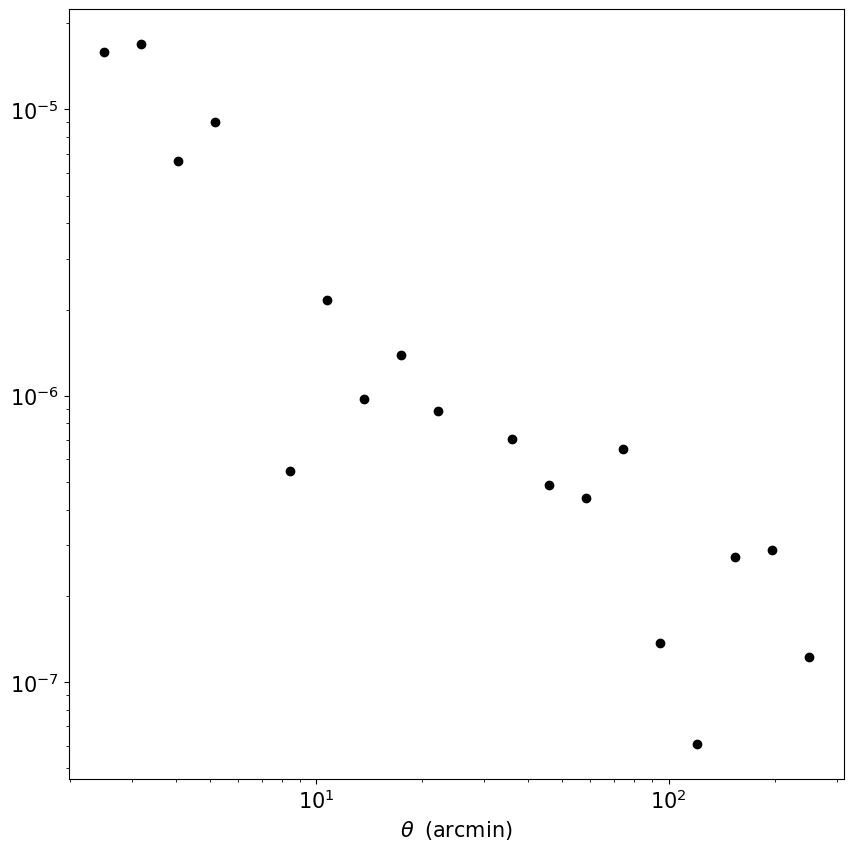

In [57]:
# From what i see from Kunhao, the order is \xi^+, \xi^-, \gamma_t and w. For the \xis, i need to decode the order of bins
# I will assume the order is (1,1), (2,1), (2,2), (3,1), ...

fig, ax = plt.subplots()
ax.scatter(thetas, values[:20], color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\theta \;\; \mathrm{(arcmin)}$')